<div style="font-size: 17px">

## Tail Distributions 



We check the empirical cumulative distribution code for 

1. The Exponential Distribution
2. Pareto Distribution
3. Gamma Distribution
4. Lognormal

Also plot tail distribution of Mittag-Leffler

In [15]:
from packages import * #Import packages in packages file
from functions import * #Import functions from functions file
import matplotlib.ticker as mticker
%matplotlib inline

In [16]:
from scipy.stats import expon

In [17]:
#Function which calculates empirical cumulative distribution
def ecdf_points(data):
    L=len(data)
    data_array=[]
    for i in range(L):
        data_array.append(data[i])
    np.asarray(data_array,float)
    x=np.sort(data_array)
    y=np.arange(0,1,1/L)
    X=[x[0]]
    Y=[y[0]]
    for i in range(0,L-1):
        if(x[i]!=x[i+1]):
            X.append(x[i+1])
            Y.append(y[i+1])
    X=np.asarray(X,float)
    Y=np.asarray(Y,float)
    return X,Y

    
def tail(x):
    x_ecdf,y_ecdf=ecdf_points(x)
    Y_ecdf=1-y_ecdf
    return x_ecdf, Y_ecdf  

<div style="font-size: 17px">
# Exponential Distribution
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

$$X \sim Exp(\lambda), \lambda>0$$
Pdf:

$$f(x) = \begin{cases} 
\lambda e^{-\lambda x} & \text{if } x \geq 0  \\
0 & \text{if } x<0 \end{cases}$$

Tail:

$$\bar{F}(x) = P(X>x) = e^{-\lambda x}, x \geq 0 $$

In Python's package implementation the scale = $\frac{1}{\lambda}$.

In [31]:

N=1000
s=100 ## => lambda = 1/s
l=1/s
x_range=np.arange(0,N,0.1)
exp_pdf=expon.pdf(x_range,scale=s)
exp_cdf=expon.cdf(x_range,scale=s)
exp_tail=1-exp_cdf

size_random=1000

exp_randoms = expon.rvs(size=size_random,scale=s)

x_exp_ecdf,y_exp_ecdf=tail(exp_randoms)


Text(0,0.5,'$\\bar{F}(x)$')

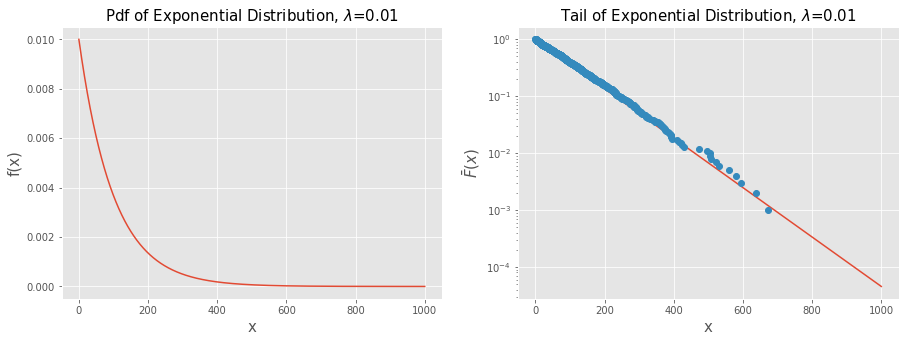

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_range,exp_pdf)
plt.title('Pdf of Exponential Distribution, $\lambda$={}'.format(l),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('f(x)',fontsize=15)

plt.subplot(122)
plt.semilogy(x_range,exp_tail)
plt.semilogy(x_exp_ecdf,y_exp_ecdf,'o')
plt.title('Tail of Exponential Distribution, $\lambda$={}'.format(l),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel(r'$\bar{F}(x)$',fontsize=15)

<div style="font-size: 17px">

# Pareto Distribution

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html

$$X \sim Pareto(x_m,\alpha), x_m, \alpha>0$$

Pdf: $$f(x) = \begin{cases} 
\dfrac{\alpha x_m^\alpha}{x^{\alpha+1}} & \text{if } x \geq x_m \\
0 & \text{if } x <x_m
\end{cases}$$

Cdf: $$\bar{F}(x) = \left( \dfrac{x_m}{x} \right)^{\alpha}, x \geq x_m $$

In Python package $$f(x)= \dfrac{b/s}{x^{b+1}}  \Rightarrow \alpha=b, s = x_m^{-b}$$ 

In [34]:
from scipy.stats import pareto

In [91]:
N=1000
x_range=np.arange(1,N,0.1)
b=2
#s=100**(-b)   #can't get scale working...
s=1
print(s)
#a=100

pareto_pdf=pareto.pdf(x_range,b,scale=s)
pareto_cdf=pareto.cdf(x_range,b,scale=s)
pareto_tail=1-pareto_cdf

pareto_randoms=pareto.rvs(b,scale=s,size=1000)

x_pareto_ecdf,y_pareto_ecdf=tail(pareto_randoms)

1


Text(0,0.5,'$\\bar{F}(x)$')

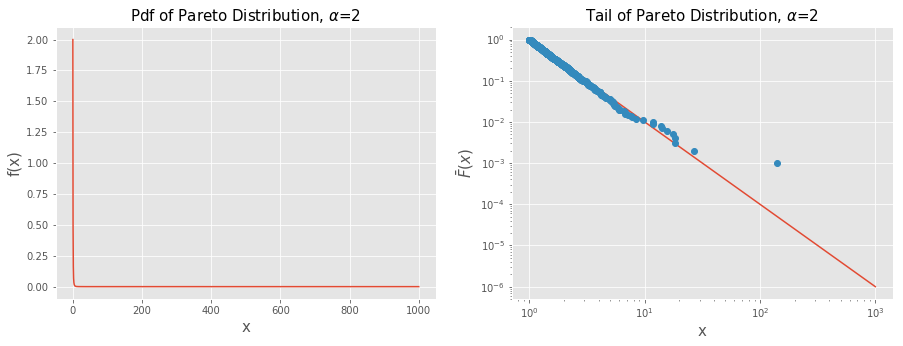

In [98]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_range,pareto_pdf)
plt.title(r'Pdf of Pareto Distribution, $\alpha$={}'.format(b),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('f(x)',fontsize=15)

plt.subplot(122)
plt.loglog(x_range,pareto_tail)
plt.loglog(x_pareto_ecdf,y_pareto_ecdf,'o')
plt.title(r'Tail of Pareto Distribution, $\alpha$={}'.format(b),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel(r'$\bar{F}(x)$',fontsize=15)

<div style="font-size: 17px">

# Gamma Distribution
https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gamma.html

https://en.wikipedia.org/wiki/Gamma_distribution

In [99]:
from scipy.stats import gamma

In [100]:
a=10
scale=0.00001
N=100
x_range=np.arange(1,N,0.1)

gamma_pdf=gamma.pdf(x_range,a,scale)
gamma_cdf=gamma.cdf(x_range,a,scale)
gamma_tail=1-gamma_cdf

gamma_randoms=gamma.rvs(a,scale,size=10000)

x_gamma_ecdf,y_gamma_ecdf=tail(gamma_randoms)

Text(0,0.5,'$\\bar{F}(x)$')

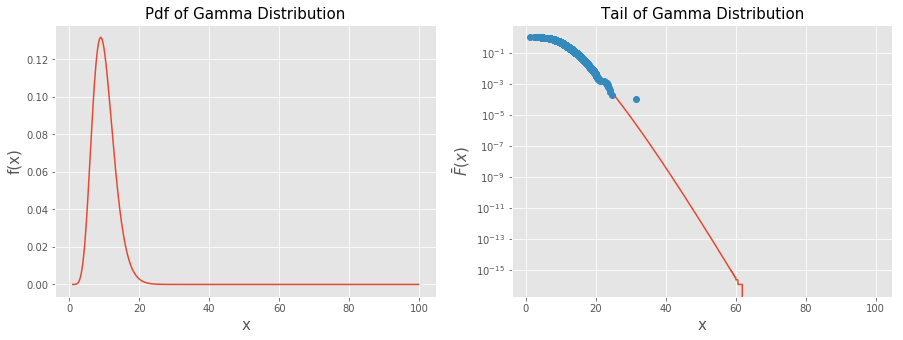

In [103]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_range,gamma_pdf)
plt.title('Pdf of Gamma Distribution',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('f(x)',fontsize=15)

plt.subplot(122)
plt.semilogy(x_range,gamma_tail)
plt.semilogy(x_gamma_ecdf,y_gamma_ecdf,'o')
plt.title('Tail of Gamma Distribution',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel(r'$\bar{F}(x)$',fontsize=15)

<div style="font-size: 17px">

# Log-normal

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html

https://en.wikipedia.org/wiki/Log-normal_distribution

In [104]:
from scipy.stats import lognorm

In [105]:
s=2
scale=0.1
N=1000

x_range=np.arange(0.1,N,0.1)

lognorm_pdf=lognorm.pdf(x_range,s,scale)
lognorm_cdf=lognorm.cdf(x_range,s,scale)
lognorm_tail=1-lognorm_cdf

lognorm_randoms=lognorm.rvs(s,scale,size=10000)

x_lognorm_ecdf,y_lognorm_ecdf=tail(lognorm_randoms)

Text(0,0.5,'$\\bar{F}(x)$')

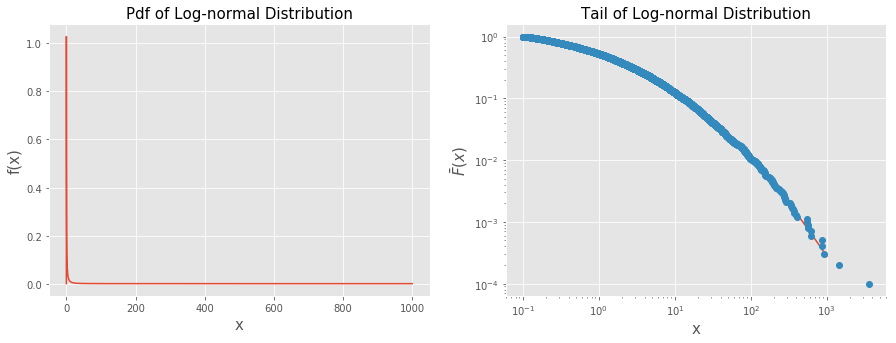

In [106]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x_range,lognorm_pdf)
plt.title('Pdf of Log-normal Distribution',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('f(x)',fontsize=15)

plt.subplot(122)
plt.loglog(x_range,lognorm_tail)
plt.loglog(x_lognorm_ecdf,y_lognorm_ecdf,'o')
plt.title('Tail of Log-normal Distribution',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel(r'$\bar{F}(x)$',fontsize=15)

<div style="font-size: 17px">

# Mittag-Leffler

https://github.com/khinsen/mittag-leffler

https://en.wikipedia.org/wiki/Mittag-Leffler_distribution

In [109]:
from mittag_leffler import ml

In [110]:
a1=0.2
a2=0.5
N=1000
tau=2
x_range=np.arange(0.1,N,0.1)


tail_ml1=ml(-x_range,a1)
tail_ml2=ml(-x_range,a2)

# def ml_pdf(x,a):
#     f=a*ml(-x,a-1)
#     return f

# f=ml_pdf(x_range,a1)

In [111]:
# plt.plot(x_range,f)

Text(0,0.5,'$\\bar{F}(x)$')

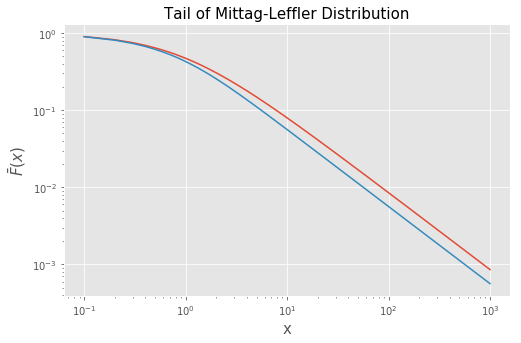

In [115]:
plt.figure(figsize=(8,5))
plt.loglog(x_range,tail_ml1)
plt.loglog(x_range,tail_ml2)
plt.title('Tail of Mittag-Leffler Distribution',fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel(r'$\bar{F}(x)$',fontsize=15)